<font size=7>Plot Weekly Schedule

In this notebook we attempt to build a weekly calendar of when different IoT devices are running. In this approach we get the times of events from the [scheduler](https://schedule.readthedocs.io/en/stable/) we are using to control devices. These events are then plotted by addapting the weekly calendar code [written here](https://github.com/utkuufuk/weekplot/blob/master/weekplot.py).

**References**
* [scheduler documentation](https://schedule.readthedocs.io/en/stable/)
* [weekply plot github](https://github.com/utkuufuk/weekplot)

<font color="red">
    
**To Do**
* Get timezones working for schedule
* Get schedule_str and jobs from iot state
* Get schedule from multiple iot devices from same experiment

# <font color="gray">Set up notebook

We must install the latest version of schedule from github

In [ ]:
#!python -m pip install --force-reinstall 'git+https://github.com/dbader/schedule.git'

import the packages that were used to create the [weekly plot](https://github.com/utkuufuk/weekplot/blob/master/weekplot.py)

In [ ]:
#!pip install namedlist
# maybe not needed #!pip install --upgrade matplotlib

In [41]:
import os
import sys
import yaml
from math import ceil
import matplotlib.pyplot as plt
from namedlist import namedlist

import scheduling package and datetime package

In [30]:
import schedule
import datetime
from datetime import date, datetime, timedelta
from dateutil import tz

import plotly to make schedule look fancy

In [ ]:
#!pip install chart_studio

In [ ]:
#import chart_studio.plotly as py

## How to use time zones

In [17]:
def sayHello(name):
    print("Hello ",name)

In [18]:
import pytz
#pytz.all_timezones

In [19]:
import schedule

In [36]:
schedule.clear()

In [39]:
schedule.every().day.at("14:00",'US/Pacific').do(sayHello, name='Time 2') 

Every 1 day at 14:00:00 do sayHello(name='Time 2') (last run: [never], next run: 2022-06-25 21:00:00)

In [84]:
schedule.every().second.do(sayHello, name='Alice') 

Every 1 second do sayHello(name='Alice') (last run: [never], next run: 2022-06-25 01:34:24)

In [86]:
schedule.get_jobs()

[Every 1 day at 08:00:00 do sayHello(name='Time 1') (last run: [never], next run: 2022-06-25 15:00:00),
 Every 1 day at 14:00:00 do sayHello(name='Time 2') (last run: [never], next run: 2022-06-25 21:00:00),
 Every 1 second do sayHello(name='Alice') (last run: 2022-06-25 01:34:33, next run: 2022-06-25 01:34:34)]

In [43]:
today = datetime.combine(date.today(), datetime.min.time())

In [46]:
schedule.get_jobs() #[0].__str__()

[Every 1 day at 08:00:00 do sayHello(name='Time 1') (last run: [never], next run: 2022-06-25 15:00:00),
 Every 1 day at 14:00:00 do sayHello(name='Time 2') (last run: [never], next run: 2022-06-25 21:00:00)]

In [31]:
datetime.now()

datetime.datetime(2022, 6, 25, 0, 59, 1, 513686)

## Change next run on schedule string

In [47]:
job = schedule.get_jobs()[0]

In [131]:
def _updateIot(device_name):
    """Updates the IoT device's publicly visible state according to the local schedule/status"""
    
    jobs, jobs_str = [],[]
    for i,job in enumerate(schedule.get_jobs()):
        jobs.append( job.__str__() )                                     # append python command that wass used to create shceduled job
        #print(i) #print(job.__str__()) #print(job.__repr__())
        
        job_str = f"Job {i}: "+job.__repr__()
        if job.last_run:                                                                                # if job was previously run
            last_time = job.last_run.astimezone(tz.gettz('US/Pacific')).strftime("%Y-%m-%d %H:%M:%S")   # get time of last scheduled event
            job_str = job_str.split("last run: ")[0]+"last run: "+last_time+", next run: "
        next_time = job.next_run.astimezone(tz.gettz('US/Pacific')).strftime("%Y-%m-%d %H:%M:%S)")      # get time of next scheduled event     
        jobs_str.append( job_str.split("next run: ")[0]+"next run: "+next_time )# append
        
    mb.update_device_state( device_name, {"schedule":jobs_str, "jobs":jobs, "status":iot_status} )


In [132]:
jobs_str, jobs = _updateIot("hasdf")

In [133]:
jobs_str

["Job 0: Every 1 day at 08:00:00 do sayHello(name='Time 1') (last run: [never], next run: 2022-06-25 08:00:00)",
 "Job 1: Every 1 day at 14:00:00 do sayHello(name='Time 2') (last run: [never], next run: 2022-06-25 14:00:00)",
 "Job 2: Every 1 second do sayHello(name='Alice') (last run: 2022-06-24 18:34:33, next run: 2022-06-24 18:34:34)"]

In [130]:
schedule.get_jobs()

[Every 1 day at 08:00:00 do sayHello(name='Time 1') (last run: [never], next run: 2022-06-25 15:00:00),
 Every 1 day at 14:00:00 do sayHello(name='Time 2') (last run: [never], next run: 2022-06-25 21:00:00),
 Every 1 second do sayHello(name='Alice') (last run: 2022-06-25 01:34:33, next run: 2022-06-25 01:34:34)]

In [134]:
jobs

["Job(interval=1, unit=days, do=sayHello, args=(), kwargs={'name': 'Time 1'})",
 "Job(interval=1, unit=days, do=sayHello, args=(), kwargs={'name': 'Time 2'})",
 "Job(interval=1, unit=seconds, do=sayHello, args=(), kwargs={'name': 'Alice'})"]

In [110]:
job = schedule.get_jobs()[2]
i=2

In [119]:
job_str = f"Job {i}: "+job.__repr__()

In [125]:
job_str

"Job 2: Every 1 second do sayHello(name='Alice') (last run: 2022-06-25 01:34:33, next run: 2022-06-25 01:34:34)"

In [124]:
job_str.split("last run: ")[0]+"last run: "+last_time+", next run: "

"Job 2: Every 1 second do sayHello(name='Alice') (last run: 2022-06-24 18:34:33"

In [120]:
job_str

"Job 2: Every 1 second do sayHello(name='Alice') (last run: 2022-06-25 01:34:33, next run: 2022-06-25 01:34:34)"

["Job 2: Every 1 second do sayHello(name='Alice') (",
 '2022-06-25 01:34:33, next run: 2022-06-25 01:34:34)']

In [111]:
job.__str__()

"Job(interval=1, unit=seconds, do=sayHello, args=(), kwargs={'name': 'Alice'})"

In [112]:
next_time = job.next_run.astimezone(tz.gettz('US/Pacific')).strftime("%Y-%m-%d %H:%M:%S)")

In [113]:
next_time

'2022-06-24 18:34:34)'

In [118]:
f"Job {i}: "+job.__repr__().split("next run: ")[0]+"next run: "+next_time

"Job 2: Every 1 second do sayHello(name='Alice') (last run: 2022-06-25 01:34:33, next run: 2022-06-24 18:34:34)"

In [117]:
job.__repr__().split("next run: ")

["Every 1 second do sayHello(name='Alice') (last run: 2022-06-25 01:34:33, ",
 '2022-06-25 01:34:34)']

In [114]:
f"Job {i}: "+job.__repr__().split("next run: ")[0]+next_time

"Job 2: Every 1 second do sayHello(name='Alice') (last run: 2022-06-25 01:34:33, 2022-06-24 18:34:34)"

In [103]:
job

Every 1 second do sayHello(name='Alice') (last run: 2022-06-25 01:34:33, next run: 2022-06-25 01:34:34)

In [105]:
last_time = job.last_run.astimezone(tz.gettz('US/Pacific')).strftime("%Y-%m-%d %H:%M:%S")

In [102]:
last_time

'2022-06-24 18:34:33'

In [108]:
job.__repr__().split("last run: ")

["Every 1 second do sayHello(name='Alice') (",
 '2022-06-25 01:34:33, next run: 2022-06-25 01:34:34)']

In [109]:
job.__repr__().split("next run: ")[0]

"Every 1 second do sayHello(name='Alice') (last run: 2022-06-25 01:34:33, "

In [83]:
if job.last_run:
    print("hello")

In [79]:
jobs_str

["Job 0: Every 1 day at 08:00:00 do sayHello(name='Time 1') (last run: [never], 2022-06-25 08:00:00)",
 "Job 1: Every 1 day at 14:00:00 do sayHello(name='Time 2') (last run: [never], 2022-06-25 14:00:00)"]

In [80]:
job_str

NameError: name 'job_str' is not defined

In [71]:
jobs_str

["Job 0: Every 1 day at 08:00:00 do sayHello(name='Time 1') (last run: [never], next run: 2022-06-25 15:00:00)",
 "Job 1: Every 1 day at 14:00:00 do sayHello(name='Time 2') (last run: [never], next run: 2022-06-25 21:00:00)"]

In [76]:
jobs_str[1]

"Job 1: Every 1 day at 14:00:00 do sayHello(name='Time 2') (last run: [never], "

"Job(interval=1, unit=days, do=sayHello, args=(), kwargs={'name': 'Time 1'})"

# <font color="purple"> Get event times from schedule 

## <font color="orange">Assuming we have schedule object

Create a dummy function to use for testing

In [ ]:
def sayHello(name):
    print("hello ", name)

Create a dummy scheduled task

In [ ]:
#schedule.every().day.at("14:24", 'US/Pacific').do(sayHello, name='Alice')   # timezones doessn't work yet

In [ ]:
schedule.every().day.at("14:24").do(sayHello, name='Alice')   # timezones doessn't work yet
schedule.every(2).hours.at(":00").do(sayHello, name='Bob')
schedule.every(34).minutes.do(sayHello, name='Zoro')
schedule.get_jobs()

In [ ]:
#schedule.clear()

get the job we created and the get all the times it will runs in between last monday and this monday

In [ ]:
jobs= schedule.get_jobs()
job = jobs[0]

Get time of last monday and next monday

In [ ]:
today = datetime.combine(date.today(), datetime.min.time())
last_mon = today - timedelta(days=-today.weekday(), weeks=1) #+ datetime.timedelta(days=1)
next_mon = today + timedelta(days=-today.weekday(), weeks=1) #+ datetime.timedelta(days=1)

Get all time that job occures before next monday.

In [ ]:
job_times = []
next_run = job.next_run
while next_run < next_mon:
    job_times.append(next_run)
    next_run += job.period

## <font color="purple"> times from IoT state info

The iot state info that we are able to grab are `schedule_str` and `jobs`. we must parse the info to build the schedule from these list of strings

In [ ]:
schedule_str= [f"Job {i}: "+x.__repr__() for i,x in enumerate(schedule.get_jobs())]   # After running jobs, get updated schedule info 
jobs= [job.__str__() for job in schedule.get_jobs()] 

parse next start time from `schedule_str`

In [ ]:
for i in range(len(jobs)):
    next_run= datetime.fromisoformat( schedule_str[i].split("next run: ")[1].split(")")[0] )
    period = timedelta(**{ jobs[i].split("unit=")[1].split(",")[0] : int(jobs[i].split("interval=")[1].split(",")[0]) })

get time of last monday and this monday

In [ ]:
today = datetime.combine(date.today(), datetime.min.time())
last_mon = today - timedelta(days=-today.weekday(), weeks=1) #+ datetime.timedelta(days=1)
next_mon = today + timedelta(days=-today.weekday(), weeks=1) #+ datetime.timedelta(days=1)

Get all times that job occures before next monday.

In [ ]:
job_times = []
while next_run < next_mon:
    job_times.append(next_run)
    next_run += period


In [ ]:
#len(job_times)

## <font color="brown"> Playing with datetime

get current time

In [ ]:
import datetime
now = datetime.datetime.now()
#datetime.datetime(2009, 1, 6, 15, 8, 24, 78915)
print(now)


get time zones

In [ ]:
import pytz
#pytz.all_timezones

Get last Monday

In [ ]:
today = datetime.date.today()
last_mon = today - datetime.timedelta(days=-today.weekday(), weeks=1) #+ datetime.timedelta(days=1)


Get next monday

In [ ]:
today = datetime.date.today()
next_mon = today + datetime.timedelta(days=-today.weekday(), weeks=1) #+ datetime.timedelta(days=1)


See if time is `datetime` object happens before another `datetime`

In [ ]:
next_mon < last_mon
last_mon < next_mon


# <font color="blue"> Create weekly calendar <font color="red">- Not Done

## <font color="blue"> Run example from github <font color="red">- Not Done

### <font color="blue"> Example Helper Code

In [ ]:
DAYS = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Event = namedlist('Event', 'name, days, startH, startM, endH, endM, color')

def getDay(prefix):
    for d in DAYS:
        if d.startswith(prefix):
            return d
    raise UserWarning("Invalid day: {0}".format(prefix))


def parseTxt(filename):
    with open(filename) as fp:
        lines = fp.readlines()
    index = 0
    latest = 0
    earliest = 24
    events = [Event('', '', '', '', '', '', '')]
    for line in lines:
        line = line.rstrip()
        index += 1
        if index == 1:
            events[-1].name = line
        elif index == 2:
            events[-1].days = [getDay(d) for d in line.replace(' ', '').split(',')]
        elif index == 3:
            hours = line.replace(' ', '').split('-')
            start = hours[0].split(':')
            end = hours[1].split(':')
            events[-1].startH = int(start[0])
            events[-1].startM = int(start[1])
            events[-1].endH = int(end[0])
            events[-1].endM = int(end[1])
            earliest = events[-1].startH if events[-1].startH < earliest else earliest
            latest = events[-1].endH + 1 if events[-1].endH > latest else latest
        elif index == 4:
            events[-1].color = line
        elif index == 5 and line == '':
            events.append(Event('', '', '', '', '', '', ''))
            index = 0
        else:
            raise UserWarning("Invalid text input format.")
    return events, earliest, latest + 1

def plotEvent(e):
    for day in e.days:
        d = DAYS.index(day) + 0.52
        start = float(e.startH) + float(e.startM) / 60
        end = float(e.endH) + float(e.endM) / 60
        plt.fill_between([d, d + 0.96], [start, start], [end, end], color=e.color)
        plt.text(d + 0.02, start + 0.02, '{0}:{1:0>2}'.format(e.startH, e.startM), va='top', fontsize=8)
        plt.text(d + 0.48, (start + end) * 0.502, e.name, ha='center', va='center', fontsize=10)

### <font color="blue"> Run Example

Get data from text file

In [ ]:
events, earliest, latest = parseTxt("weekplot_events.txt")

In [ ]:
events
earliest
latest

Create plot 

In [ ]:
fig = plt.figure(figsize=(18, 9))
#plt.figure().clear()
#plt.close()
#plt.cla()
#plt.clf()

plt.title('Weekly Schedule', y=1, fontsize=14)
ax=fig.add_subplot(1, 1, 1)
ax.grid(axis='y', linestyle='--', linewidth=0.5)

ax.set_xlim(0.5, len(DAYS) + 0.5)
ax.set_xticks(range(1, len(DAYS) + 1))
ax.set_xticklabels(DAYS)
ax.set_ylim(latest, earliest)
ax.set_yticks(range(ceil(earliest), ceil(latest)))
ax.set_yticklabels(["{0}:00".format(h) for h in range(ceil(earliest), ceil(latest))])
#plt.savefig('{0}.png'.format(os.path.splitext(sys.argv[1])[0]), dpi=200, bbox_inches='tight')

for e in events:
    plotEvent(e)

## <font color="blue"> Adapt example <font color="green"> - assuming IoT State data

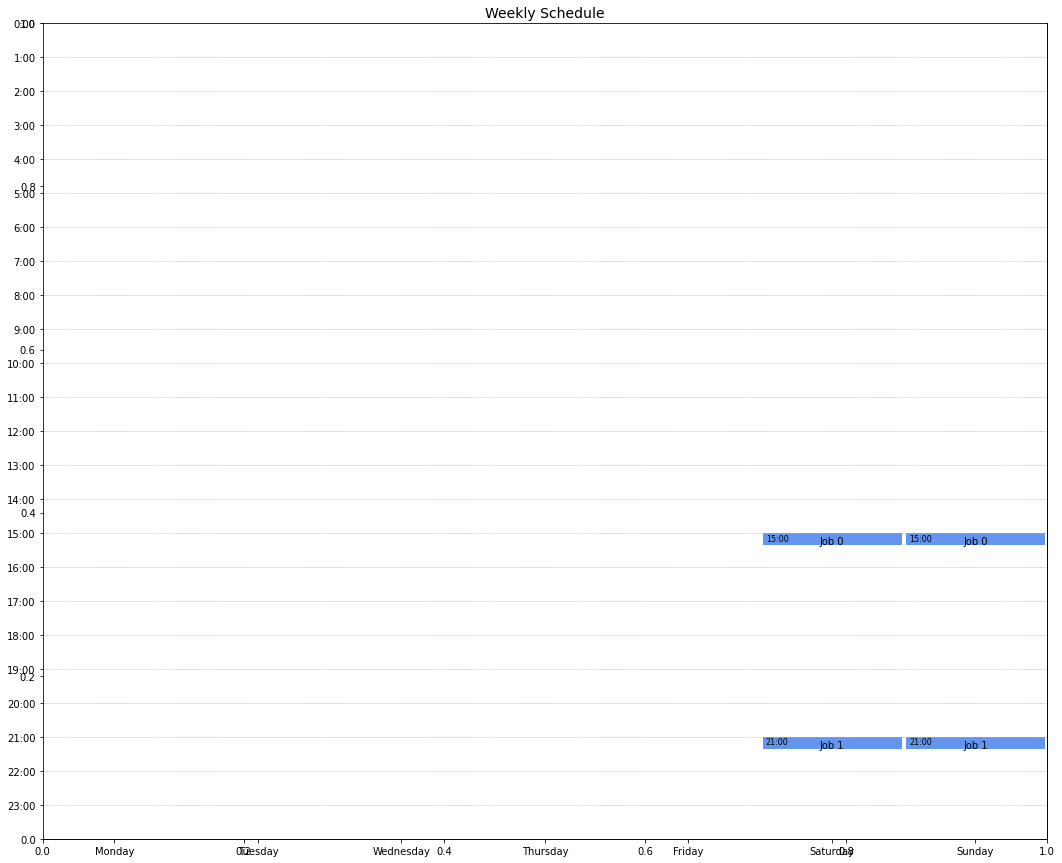

In [45]:
fig = plt.figure(figsize=(18, 15))                    # Create figure for plotting
plt.title('Weekly Schedule', y=1, fontsize=14)       # Give the figure a title
ax=fig.add_subplot(1, 1, 1)                          # Create a plot in the figure 
ax.grid(axis='y', linestyle='--', linewidth=0.5)     # Add horizonal grid lines to the plot

DAYS = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xlim(0.5, len(DAYS) + 0.5)
ax.set_xticks(range(1, len(DAYS) + 1))
ax.set_xticklabels(DAYS)
ax.set_ylim( 24, 0)
ax.set_yticks(range(0, 24))
ax.set_yticklabels(["{0}:00".format(h) for h in range(0, 24)])
#plt.savefig('{0}.png'.format(os.path.splitext(sys.argv[1])[0]), dpi=200, bbox_inches='tight')

# !!! this code below should be wrapped in a for loop that allows this to be done with multiple devices
# !!! These two lines of code should be replaced by some "iot.get_device_state" command that get schedule's info from device state
schedule_str= [f"Job {i}: "+x.__repr__() for i,x in enumerate(schedule.get_jobs())]   # After running jobs, get updated schedule info 
jobs= [job.__str__() for job in schedule.get_jobs()] 

for i in range(len(jobs)):                             # for each job, we get it's next run time, and run interval for IoT state information
    next_run= datetime.fromisoformat( schedule_str[i].split("next run: ")[1].split(")")[0] )
    period = timedelta(**{ jobs[i].split("unit=")[1].split(",")[0] : int(jobs[i].split("interval=")[1].split(",")[0]) })
    next_mon =  + timedelta(days=-today.weekday(), weeks=1)   # we will consider all job events that ocure before next monday
    today = datetime.combine(date.today(), datetime.min.time())
    next_mon =  today + timedelta(days=-today.weekday(), weeks=1)   # we will consider all job events that ocure before next monday
    job_times = []                   # create a list of all event times for a job
    while next_run < next_mon:
        job_times.append(next_run)
        next_run += period
    
    for event in job_times:
        d = event.weekday() + 0.52                                                   # get day of week for event
        start = float(event.hour) + float(event.minute) / 60                         # get start time of event
        end = float(event.hour) + (float(event.minute)+20) / 60                      # Ends 30 minutes after start
        plt.fill_between([d, d + 0.96], [start, start], [end, end], color="cornflowerblue")
        plt.text(d + 0.02, start + 0.02, '{0}:{1:0>2}'.format(event.hour, event.minute), va='top', fontsize=8)
        plt.text(d + 0.48, (start + end) * 0.502, f"Job {i}", ha='center', va='center', fontsize=10)


## <font color="blue"> Adapt example to python scheduler <font color="red">- With `schedule.get_jobs()`

In [ ]:
fig = plt.figure(figsize=(18, 15))                    # Create figure for plotting
plt.title('Weekly Schedule', y=1, fontsize=14)       # Give the figure a title
ax=fig.add_subplot(1, 1, 1)                          # Create a plot in the figure 
ax.grid(axis='y', linestyle='--', linewidth=0.5)     # Add horizonal grid lines to the plot

DAYS = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xlim(0.5, len(DAYS) + 0.5)
ax.set_xticks(range(1, len(DAYS) + 1))
ax.set_xticklabels(DAYS)
ax.set_ylim( 24, 0)
ax.set_yticks(range(0, 24))
ax.set_yticklabels(["{0}:00".format(h) for h in range(0, 24)])
#plt.savefig('{0}.png'.format(os.path.splitext(sys.argv[1])[0]), dpi=200, bbox_inches='tight')

# add job event to calendar
for i,job in enumerate(schedule.get_jobs()):
    job_times = []
    next_run = job.next_run
    while next_run < next_mon:
        job_times.append(next_run)
        next_run += job.period

    for event in job_times:
        d = event.weekday() + 0.52                                                   # get day of week for event
        start = float(event.hour) + float(event.minute) / 60                         # get start time of event
        end = float(event.hour) + (float(event.minute)+20) / 60                      # Ends 30 minutes after start
        plt.fill_between([d, d + 0.96], [start, start], [end, end], color="cornflowerblue")
        plt.text(d + 0.02, start + 0.02, '{0}:{1:0>2}'.format(event.hour, event.minute), va='top', fontsize=8)
        plt.text(d + 0.48, (start + end) * 0.502, f"Job {i}", ha='center', va='center', fontsize=10)

In [ ]:
for event in job_times:
    d = event.weekday() + 0.52                                                   # get day of week for event
    start = float(event.hour) + float(event.minute) / 60                         # get start time of event
    end = float(event.hour) + (float(event.minute)+30) / 60                      # Ends 30 minutes after start
    plt.fill_between([d, d + 0.96], [start, start], [end, end], color="cornflowerblue")
    plt.text(d + 0.02, start + 0.02, f'{event.hour}:{event.minute}', va='top', fontsize=8)
    plt.text(d + 0.48, (start + end) * 0.502, e.name, ha='center', va='center', fontsize=10)

## <font color="blue"> Get plot on plotly <font color="red">- Not Done

[Tutorial](https://geo-python.github.io/2017/lessons/L7/using-plotly.html#:~:text=To%20save%20plots%20to%20plotly,use%20to%20make%20a%20plot.&text=So%20that's%20it%3F,plotly%20site%20(i.e.%2C%20py.) on how to connect matplotlib to plotly.

[Another tutorial](https://towardsdatascience.com/matplotlib-to-plotly-chart-conversion-4bd260e73434)

In [ ]:
#unique_url = py.plot_mpl(fig, filename="sin(x) test plot")

In [ ]:
#!pip install mpld3

In [ ]:
import mpld3

In [ ]:
mpld3.display(fig)

# Old trys

In [ ]:
    def plot_chart(self, data_frame, style, chart_type):

        self.apply_style_sheet(style)

        if style.xkcd:
            plt.xkcd()

        # create figure & add a subplot
        fig = plt.figure(figsize = ((style.width * abs(style.scale_factor))/style.dpi,
                                    (style.height * abs(style.scale_factor))/style.dpi), dpi = style.dpi)

        if style.title is not None:
            fig.suptitle(style.title, fontsize = 14 * abs(style.scale_factor))

        # matplotlib 1.5
        try:
            cyc = matplotlib.rcParams['axes.prop_cycle']
            color_cycle =  [x['color'] for x in cyc]
        except KeyError:
            # pre 1.5
            pass
            # color_cycle =  matplotlib.rcParams['axes.color_cycle']

        cm = ColorMaster()

        data_frame_list = self.split_data_frame_to_list(data_frame, style)

        subplot_no = 1

        for data_frame in data_frame_list:

            bar_ind = np.arange(0, len(data_frame.index))

            # for bar charts, create a proxy x-axis (then relabel)
            xd, bar_ind, has_bar, no_of_bars = self.get_bar_indices(data_frame, style, chart_type, bar_ind)

            if style.subplots == False and len(data_frame_list) == 1:
                ax = fig.add_subplot(111)
            else:
                ax = fig.add_subplot(2,1,subplot_no)

            subplot_no = subplot_no + 1

            if style.x_title != '': ax.set_xlabel(style.x_title)
            if style.y_title != '': ax.set_ylabel(style.y_title)

            plt.xlabel(style.x_title)
            plt.ylabel(style.y_title)

            # format Y axis
            y_formatter = matplotlib.ticker.ScalarFormatter(useOffset = False)
            ax.yaxis.set_major_formatter(y_formatter)

            # create a second y axis if necessary
            ax2 = []

            ax.xaxis.grid(style.x_axis_showgrid)
            ax.yaxis.grid(style.y_axis_showgrid)

            if style.y_axis_2_series != []:
                ax2 = ax.twinx()

                # set grid for second y axis
                ax2.yaxis.grid(style.y_axis_2_showgrid)

            try:
                # get all the correct colors (and construct gradients if necessary eg. from 'blues')

                # for stacked bar
                yoff_pos = np.zeros(len(data_frame.index.values)) # the bottom values for stacked bar chart
                yoff_neg = np.zeros(len(data_frame.index.values)) # the bottom values for stacked bar chart

                zeros = np.zeros(len(data_frame.index.values))

                # for bar chart
                bar_space = 0.2
                bar_width = (1 - bar_space) / (no_of_bars)
                bar_index = 0

                has_matrix = False

                if not(isinstance(chart_type, list)):
                    if chart_type == 'heatmap':
                        ax.set_frame_on(False)

                        # weird hack, otherwise comes out all inverted!
                        data_frame = data_frame.iloc[::-1]

                        color = style.color

                        if style.color == []:
                            color = cc.chartfactory_default_colormap
                        else:
                            if isinstance(style.color, list):
                                color = style.color[subplot_no - 1]

                        ax.pcolor(data_frame.values, cmap=color, alpha=0.8)

                        has_matrix = True

                if (not(has_matrix)):
                    # plot the lines (using custom palettes as appropriate)
                    color_spec = cm.create_color_list(style, data_frame)

                    # some lines we should exclude from the color and use the default palette
                    for i in range(0, len(data_frame.columns.values)):

                        if isinstance(chart_type, list): chart_type_ord = chart_type[i]
                        else: chart_type_ord = chart_type

                        label = str(data_frame.columns[i])

                        ax_temp = self.get_axis(ax, ax2, label, style.y_axis_2_series)

                        yd = data_frame.ix[:,i]

                        if color_spec[i] is None:
                            color_spec[i] = color_cycle[i % len(color_cycle)]

                        if (chart_type_ord == 'line'):
                            linewidth_t = self.get_linewidth(label,
                                                             style.linewidth, style.linewidth_2, style.linewidth_2_series)

                            if linewidth_t is None: linewidth_t = matplotlib.rcParams['axes.linewidth']

                            ax_temp.plot(xd, yd, label = label, color = color_spec[i],
                                         linewidth = linewidth_t)

                        elif(chart_type_ord == 'bar'):
                            # for multiple bars we need to allocate space properly
                            bar_pos = [k - (1 - bar_space) / 2. + bar_index * bar_width for k in range(0,len(bar_ind))]

                            ax_temp.bar(bar_pos, yd, bar_width, label = label, color = color_spec[i])

                            bar_index = bar_index + 1

                        elif (chart_type_ord == 'barh'):
                            # for multiple bars we need to allocate space properly
                            bar_pos = [k - (1 - bar_space) / 2. + bar_index * bar_width for k in range(0, len(bar_ind))]

                            ax_temp.barh(bar_pos, yd, bar_width, label=label, color=color_spec[i])

                            bar_index = bar_index + 1

                        elif(chart_type_ord == 'stacked'):
                            bar_pos = [k - (1 - bar_space) / 2. + bar_index * bar_width for k in range(0,len(bar_ind))]

                            yoff = np.where(yd > 0, yoff_pos, yoff_neg)

                            ax_temp.bar(bar_pos, yd, label = label, color = color_spec[i], bottom = yoff)

                            yoff_pos = yoff_pos + np.maximum(yd, zeros)
                            yoff_neg = yoff_neg + np.minimum(yd, zeros)

                            # bar_index = bar_index + 1

                        elif(chart_type_ord == 'scatter'):
                            ax_temp.scatter(xd, yd, label = label, color = color_spec[i])

                            if style.line_of_best_fit is True:
                                self.trendline(ax_temp, xd.values, yd.values, order=1, color= color_spec[i], alpha=1,
                                               scale_factor = abs(style.scale_factor))


                # format X axis
                self.format_x_axis(ax, data_frame, style, has_bar, bar_ind, has_matrix)

            except: pass

            if style.display_source_label == True and style.source is not None:
                ax.annotate('Source: ' + style.source, xy = (1, 0), xycoords='axes fraction', fontsize=7 * abs(style.scale_factor),
                            xytext=(-5 * abs(style.scale_factor), 10 * abs(style.scale_factor)), textcoords='offset points',
                            ha='right', va='top', color = style.source_color)

            if style.display_brand_label == True:
                self.create_brand_label(ax, anno = style.brand_label, scale_factor = abs(style.scale_factor))

            leg = []
            leg2 = []

            loc = 'best'

            # if we have two y-axis then make sure legends are in opposite corners
            if ax2 != []: loc = 2

            try:
                leg = ax.legend(loc = loc, prop={'size':10 * abs(style.scale_factor)})
                leg.get_frame().set_linewidth(0.0)
                leg.get_frame().set_alpha(0)

                if ax2 != []:
                    leg2 = ax2.legend(loc = 1, prop={'size':10 * abs(style.scale_factor)})
                    leg2.get_frame().set_linewidth(0.0)
                    leg2.get_frame().set_alpha(0)
            except: pass

            try:
                if style.display_legend is False:
                    if leg != []: leg.remove()
                    if leg2 != []: leg.remove()
            except: pass

        # fig.autofmt_xdate()

        try:
            style = self.generate_file_names(style, 'matplotlib')

            plt.savefig(style.file_output, transparent=False)
        except: pass


        ####### various matplotlib converters are unstable
        # convert to D3 format with mpld3
        try:
            # output matplotlib charts externally to D3 based libraries
            import mpld3

            if style.display_mpld3 == True:
                mpld3.save_d3_html(fig, style.html_file_output)
                mpld3.show(fig)
        except: pass

        # FRAGILE! convert to Bokeh format
        # better to use direct Bokeh renderer
        try:
            if (style.convert_matplotlib_to_bokeh == True):
                from bokeh.plotting import output_file, show
                from bokeh import mpl

                output_file(style.html_file_output)
                show(mpl.to_bokeh())
        except: pass

        # FRAGILE! convert matplotlib chart to Plotly format
        # recommend using AdapterCufflinks instead to directly plot to Plotly
        try:
            import plotly.plotly as py
            import plotly
            import plotly.tools as tls

            if style.convert_matplotlib_to_plotly == True:
                plotly.tools.set_credentials_file(username = style.plotly_username,
                                                  api_key = style.plotly_api_key)

                py_fig = tls.mpl_to_plotly(fig, strip_style = True)
                plot_url = py.plot_mpl(py_fig, filename = style.plotly_url)
        except:
            pass

        # display in matplotlib window (or clear from pyplot)
        try:
            if cc.chartfactory_silent_display == True:
                plt.close(fig)

                return fig
            elif style.silent_display == False:
                plt.show()
            else:
                plt.close(fig)

                return fig
        except:
            pass

In [ ]:
import numpy as np 
# Create some data arrays
x = np.linspace(-2.0 * np.pi, 2.0 * np.pi, 51)
y = np.sin(x)

# Make a plot
mpl_fig = plt.figure()
plt.plot(x, y, 'ko--')
plt.title('sin(x) from -2*pi to 2*pi')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

# Export plot to plotly
unique_url = py.plot_mpl(mpl_fig, filename="sin(x) test plot")

In [ ]:
%matplotlib inline

In [ ]:
import plotly
print(plotly.__version__)
import datetime
import matplotlib.pyplot as plt
import chart_studio.plotly as py
#from plotly.offline import init_notebook_mode, enable_mpl_offline, iplot_mpl
from chart_studio.offline import init_notebook_mode, enable_mpl_offline, iplot_mpl
init_notebook_mode()
enable_mpl_offline()

date = plt.figure()
x = [datetime.datetime(2010, 12, 1, 10, 0),
datetime.datetime(2011, 1, 4, 9, 0),
datetime.datetime(2011, 5, 5, 9, 0)]
y = [4, 9, 2]
ax = plt.subplot(111)
ax.bar(x, y, width=10)
ax.xaxis_date()

iplot_mpl(date)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with fig.show()"
)
fig.show()

In [ ]:
fig = plt.figure(1)
ax = plt.plot([1,2,3])
plotly.tools.mpl_to_plotly(fig)

In [ ]:
import matplotlib.pyplot as plt
import plotly
import chart_studio.plotly as py
import plotly.tools as tls

fig, ax = plt.subplots()
ax.plot([1, 2, 3], [1, 4, 9], "o")

plotly_fig = tls.mpl_to_plotly(fig)
plotly.offline.plot(plotly_fig, filename="plotly version of an mpl figure")